In [1]:
%%time
import malaya

CPU times: user 3.84 s, sys: 564 ms, total: 4.41 s
Wall time: 4.35 s


In [2]:
anger_text = 'babi la company ni, aku dah la penat datang dari jauh'
fear_text = 'takut doh tengok cerita hantu tadi'
joy_text = 'bestnya dapat tidur harini, tak payah pergi kerja'
love_text = 'aku sayang sgt dia dah doh'
sadness_text = 'kecewa tengok kerajaan baru ni, janji ape pun tak dapat'
surprise_text = 'sakit jantung aku, terkejut dengan cerita hantu tadi'

All models got `get_proba` parameters.
If True, it will returned probability every classes. Else, it will return highest probability class. **Default is True.**

I suggest you to use BERT models to understand emotion, these models are better for detecting emotions from social media.

## Load multinomial model

In [3]:
model = malaya.emotion.multinomial()
print(model.predict(anger_text))
print(model.predict(anger_text,get_proba=True))
model.predict_batch([anger_text,
                    fear_text,
                    joy_text,
                    love_text,
                    sadness_text,
                    surprise_text])

sadness
{'anger': 0.2783388656630603, 'fear': 0.0075400571793303155, 'joy': 0.1476835629123573, 'love': 0.11405594252487884, 'sadness': 0.4367800906755447, 'surprise': 0.015601481044831793}


['sadness', 'sadness', 'sadness', 'love', 'sadness', 'surprise']

## Load xgb model

In [4]:
model = malaya.emotion.xgb()
print(model.predict(anger_text))
print(model.predict(anger_text,get_proba=True))
model.predict_batch([anger_text,
                    fear_text,
                    joy_text,
                    love_text,
                    sadness_text,
                    surprise_text],get_proba=True)

anger
{'anger': 0.9978795, 'fear': 9.978641e-05, 'joy': 0.00025914068, 'love': 0.00023505572, 'sadness': 0.001336072, 'surprise': 0.00019047104}


[{'anger': 0.9978795,
  'fear': 9.978641e-05,
  'joy': 0.00025914068,
  'love': 0.00023505572,
  'sadness': 0.001336072,
  'surprise': 0.00019047104},
 {'anger': 0.0009182028,
  'fear': 0.9938689,
  'joy': 0.0006466028,
  'love': 0.0006217728,
  'sadness': 0.0034322464,
  'surprise': 0.0005122587},
 {'anger': 0.121579394,
  'fear': 0.010898398,
  'joy': 0.0679293,
  'love': 0.061627034,
  'sadness': 0.70120406,
  'surprise': 0.036761835},
 {'anger': 0.00063075585,
  'fear': 0.0001394003,
  'joy': 0.00041401104,
  'love': 0.9967757,
  'sadness': 0.001852509,
  'surprise': 0.00018767058},
 {'anger': 0.005961609,
  'fear': 0.0007963562,
  'joy': 0.00073812285,
  'love': 0.0011268321,
  'sadness': 0.9896236,
  'surprise': 0.0017534137},
 {'anger': 0.00033342876,
  'fear': 0.0005808544,
  'joy': 9.261517e-05,
  'love': 6.766275e-05,
  'sadness': 0.062978186,
  'surprise': 0.93594724}]

## BERT model

BERT is the best emotion model in term of accuracy, you can check emotion accuracy here, https://malaya.readthedocs.io/en/latest/Accuracy.html#emotion-analysis. Question is, why BERT?

1. Transformer model learn the context of a word based on all of its surroundings (live string), bidirectionally. So it much better understand left and right hand side relationships.
2. Because of transformer able to leverage to context during live string, we dont need to capture available words in this world, instead capture substrings and build the attention after that. BERT will never have Out-Of-Vocab problem.

## List available BERT models

In [5]:
malaya.emotion.available_bert_model()

['multilanguage', 'base', 'small']

## Load BERT models

In [6]:
model = malaya.emotion.bert(model = 'base')

W0807 17:09:45.435723 4654429632 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_utils/_utils.py:45: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

W0807 17:09:45.436901 4654429632 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_utils/_utils.py:46: The name tf.GraphDef is deprecated. Please use tf.compat.v1.GraphDef instead.

W0807 17:09:54.915079 4654429632 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_utils/_utils.py:41: The name tf.InteractiveSession is deprecated. Please use tf.compat.v1.InteractiveSession instead.



#### Predict single string

In [7]:
model.predict(anger_text,get_proba=True)

{'anger': 0.9995183,
 'fear': 0.00017419625,
 'joy': 2.3122206e-05,
 'love': 0.00023385807,
 'sadness': 1.1843695e-05,
 'surprise': 3.8671737e-05}

#### Predict batch of strings

In [8]:
model.predict_batch([anger_text, fear_text, joy_text,
                    love_text, sadness_text, surprise_text],get_proba=True)

[{'anger': 0.9995183,
  'fear': 0.00017419609,
  'joy': 2.3122226e-05,
  'love': 0.00023385829,
  'sadness': 1.1843717e-05,
  'surprise': 3.8671773e-05},
 {'anger': 1.5641068e-05,
  'fear': 0.9999746,
  'joy': 4.5618248e-07,
  'love': 4.5089317e-07,
  'sadness': 8.657858e-06,
  'surprise': 9.3441265e-08},
 {'anger': 0.3507574,
  'fear': 0.62003326,
  'joy': 0.0031742232,
  'love': 0.025879076,
  'sadness': 0.00010764296,
  'surprise': 4.8396298e-05},
 {'anger': 2.5379663e-08,
  'fear': 9.535107e-09,
  'joy': 4.0943105e-06,
  'love': 0.99999547,
  'sadness': 3.593608e-08,
  'surprise': 3.6860254e-07},
 {'anger': 3.586574e-08,
  'fear': 4.728145e-10,
  'joy': 4.6839768e-09,
  'love': 9.5798065e-08,
  'sadness': 0.9998424,
  'surprise': 0.00015748068},
 {'anger': 1.1578501e-05,
  'fear': 1.1245108e-05,
  'joy': 1.9180196e-05,
  'love': 2.3472696e-05,
  'sadness': 0.59861374,
  'surprise': 0.40132073}]

#### Open emotion visualization dashboard

Default when you call `predict_words` it will open a browser with visualization dashboard, you can disable by `visualization=False`.

In [ ]:
model.predict_words(sadness_text)

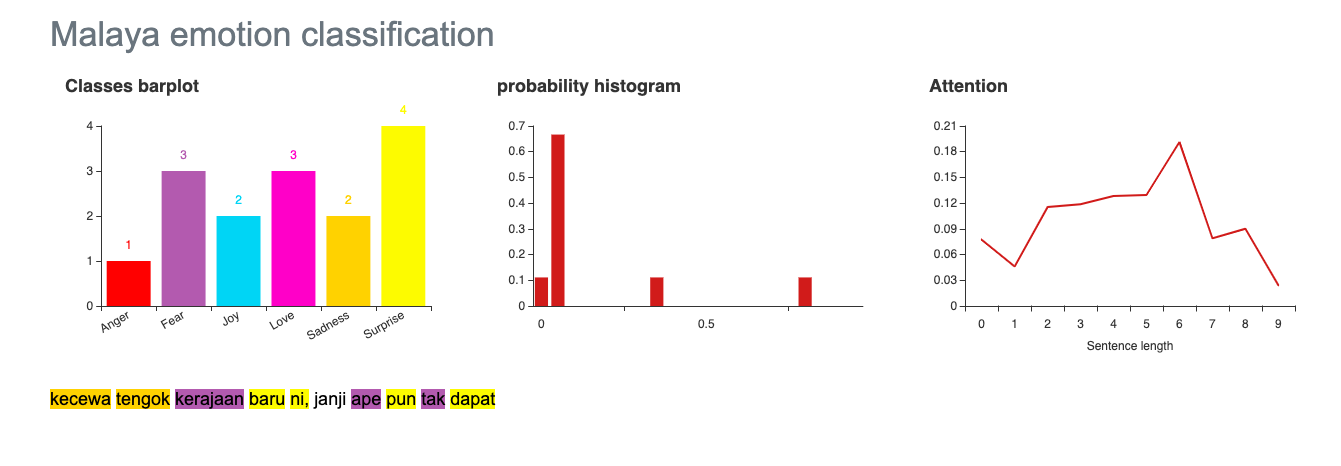

In [9]:
from IPython.core.display import Image, display

display(Image('emotion-bert.png', width=800))

## List available deep learning models

In [10]:
malaya.emotion.available_deep_model()

['self-attention', 'bahdanau', 'luong']

## Load deep learning models

Good thing about deep learning models from Malaya, it returns `Attention` result, means, which part of words give the high impact to the results. But to get `Attention`, you need to set `get_proba=True`.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [12]:
model = malaya.emotion.deep_model('bahdanau')

#### Predict single string

In [13]:
model.predict(anger_text)

'anger'

In [14]:
result = model.predict(sadness_text,get_proba=True)
result

{'anger': 0.37485132,
 'fear': 0.00032864438,
 'joy': 1.5022197e-05,
 'love': 0.00061594445,
 'sadness': 0.6070886,
 'surprise': 0.017100457,
 'attention': {'kecewa': 0.9977679,
  'tengok': 0.0003109447,
  'kerajaan': 0.00026438202,
  'baru': 0.00031487268,
  'ni': 0.00021063162,
  ',': 0.0,
  'janji': 0.00028104617,
  'ape': 0.0002138007,
  'pun': 0.00020744104,
  'tak': 0.00022231438,
  'dapat': 0.00020670859}}

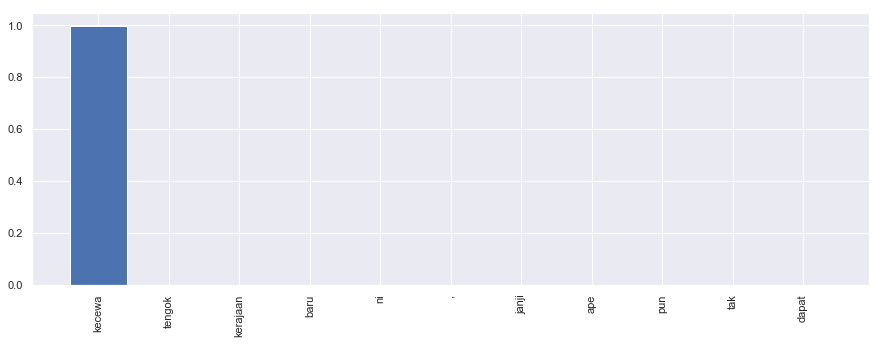

In [15]:
plt.figure(figsize = (15, 5))
keys = result['attention'].keys()
values = result['attention'].values()
aranged = [i for i in range(len(keys))]
plt.bar(aranged, values)
plt.xticks(aranged, keys, rotation = 'vertical')
plt.show()

#### Open emotion visualization dashboard

Default when you call `predict_words` it will open a browser with visualization dashboard, you can disable by `visualization=False`.

In [ ]:
model.predict_words(sadness_text)

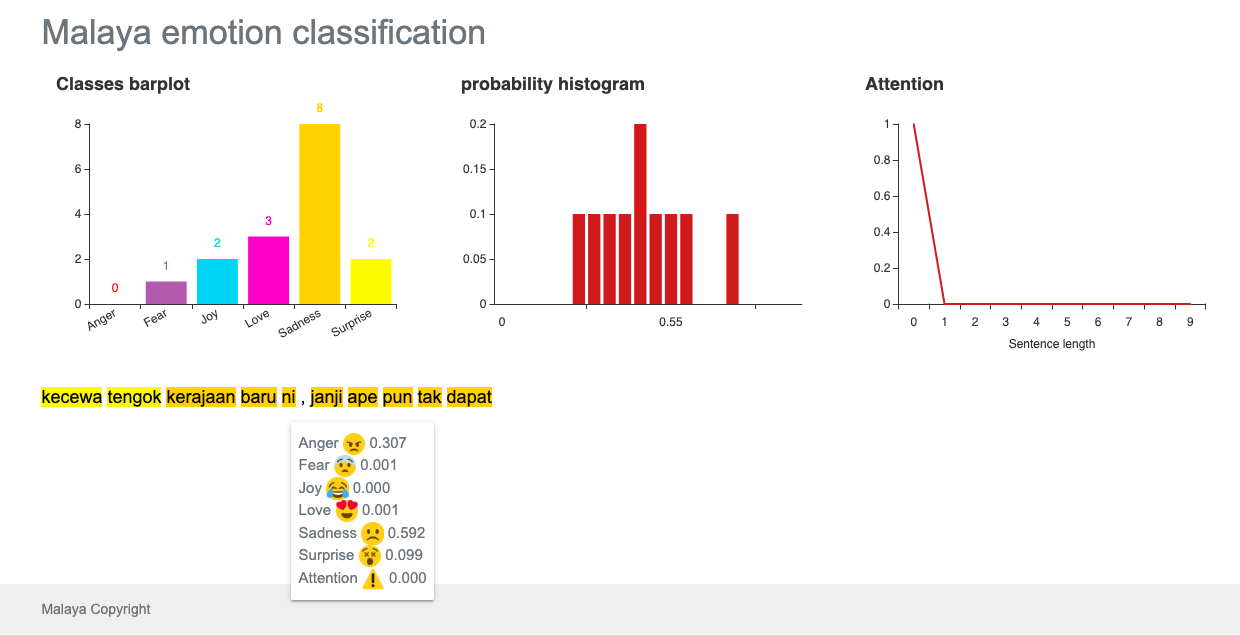

In [17]:
from IPython.core.display import Image, display

display(Image('emotion-bahdanau.png', width=800))

#### Predict batch of strings

In [18]:
model.predict_batch([anger_text, fear_text, joy_text,
                    love_text, sadness_text, surprise_text],get_proba=True)

[{'anger': 0.9698364,
  'fear': 0.0005593651,
  'joy': 7.586122e-06,
  'love': 6.342388e-05,
  'sadness': 0.0012171157,
  'surprise': 0.028316086},
 {'anger': 0.01627067,
  'fear': 0.98331857,
  'joy': 2.085193e-05,
  'love': 0.000109021596,
  'sadness': 0.00011855385,
  'surprise': 0.00016231627},
 {'anger': 0.6955227,
  'fear': 0.019949429,
  'joy': 0.0003242087,
  'love': 0.0029656421,
  'sadness': 0.24429333,
  'surprise': 0.03694471},
 {'anger': 0.014253476,
  'fear': 0.00040774103,
  'joy': 0.0020515865,
  'love': 0.9768023,
  'sadness': 0.001647722,
  'surprise': 0.0048371824},
 {'anger': 0.47867623,
  'fear': 0.0008374439,
  'joy': 4.5983707e-05,
  'love': 0.0014944059,
  'sadness': 0.50689435,
  'surprise': 0.012051674},
 {'anger': 0.030955592,
  'fear': 0.002918538,
  'joy': 0.0005409431,
  'love': 0.0005454879,
  'sadness': 0.3531333,
  'surprise': 0.6119062}]

**You might want to try `luong` and `self-attention` by yourself.**

## Stacking models

More information, you can read at [https://malaya.readthedocs.io/en/latest/Stack.html](https://malaya.readthedocs.io/en/latest/Stack.html)

In [19]:
multinomial = malaya.emotion.multinomial()
xgb = malaya.emotion.xgb()

In [20]:
malaya.stack.predict_stack([multinomial, xgb], anger_text)

[{'anger': 0.5270186424918443,
  'fear': 0.0008674071997769519,
  'joy': 0.006186341331275944,
  'love': 0.005177789253535511,
  'sadness': 0.024157186192154973,
  'surprise': 0.0017238417196054668}]

In [21]:
malaya.stack.predict_stack([multinomial, xgb], [anger_text, sadness_text])

[{'anger': 0.5270186424918443,
  'fear': 0.0008674071997769519,
  'joy': 0.006186341331275944,
  'love': 0.005177789253535511,
  'sadness': 0.024157186192154973,
  'surprise': 0.0017238417196054668},
 {'anger': 0.03557488295072826,
  'fear': 0.0034467216292791546,
  'joy': 0.008254856407000835,
  'love': 0.010299470402616383,
  'sadness': 0.7530517475731497,
  'surprise': 0.004829871653663491}]